In [2]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

In [3]:
# Fetch historical gold price data (hourly) within the last 730 days
end_date = datetime.now()
start_date = end_date - timedelta(days=700)

gold_data = yf.download('GC=F', start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'), interval='1h')

[*********************100%%**********************]  1 of 1 completed


In [4]:
gold_data

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-06-26 18:00:00-04:00,1839.599976,1842.599976,1834.199951,1835.900024,1835.900024,4037
2022-06-26 19:00:00-04:00,1835.900024,1836.500000,1832.300049,1833.300049,1833.300049,1885
2022-06-26 20:00:00-04:00,1833.199951,1834.099976,1830.099976,1831.000000,1831.000000,1696
2022-06-26 21:00:00-04:00,1831.000000,1838.599976,1830.400024,1836.400024,1836.400024,4533
2022-06-26 22:00:00-04:00,1836.400024,1838.800049,1836.099976,1837.599976,1837.599976,2461
...,...,...,...,...,...,...
2024-05-24 12:00:00-04:00,2335.800049,2338.199951,2334.000000,2335.500000,2335.500000,7131
2024-05-24 13:00:00-04:00,2335.399902,2335.699951,2332.800049,2333.800049,2333.800049,7148
2024-05-24 14:00:00-04:00,2333.899902,2337.899902,2333.699951,2336.000000,2336.000000,3254


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Check if data was fetched
if gold_data.empty:
    print("Failed to fetch data. Please check the symbol and date range.")
else:
    # Prepare the data
    gold_data['Return'] = gold_data['Close'].pct_change()
    gold_data['Volatility'] = gold_data['Return'].rolling(window=10).std()
    gold_data['Momentum'] = gold_data['Close'].diff(10)
    gold_data.dropna(inplace=True)

    # Define features and target variable
    features = ['Volume', 'Open', 'Volatility', 'Momentum']
    X = gold_data[features]
    y = gold_data['Close']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_test)

    # Evaluate the model
    r2 = r2_score(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)

    # Display the predictions
    results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
    results.index = pd.to_datetime(results.index)

    # Sort DataFrame based on datetime index
    results_sorted = results.sort_index()
    print(results_sorted)


                                Actual    Predicted
Datetime                                           
2022-06-27 04:00:00-04:00  1841.599976  1838.132003
2022-06-27 07:00:00-04:00  1835.300049  1838.518999
2022-06-27 12:00:00-04:00  1826.699951  1823.804019
2022-06-27 14:00:00-04:00  1825.000000  1823.495027
2022-06-27 19:00:00-04:00  1824.300049  1822.867009
...                                ...          ...
2024-05-23 13:00:00-04:00  2333.699951  2342.323992
2024-05-24 06:00:00-04:00  2341.800049  2339.725984
2024-05-24 10:00:00-04:00  2339.600098  2337.621995
2024-05-24 15:00:00-04:00  2335.000000  2336.212029
2024-05-24 16:00:00-04:00  2335.199951  2336.077009

[2206 rows x 2 columns]


In [6]:
import matplotlib.pyplot as plt

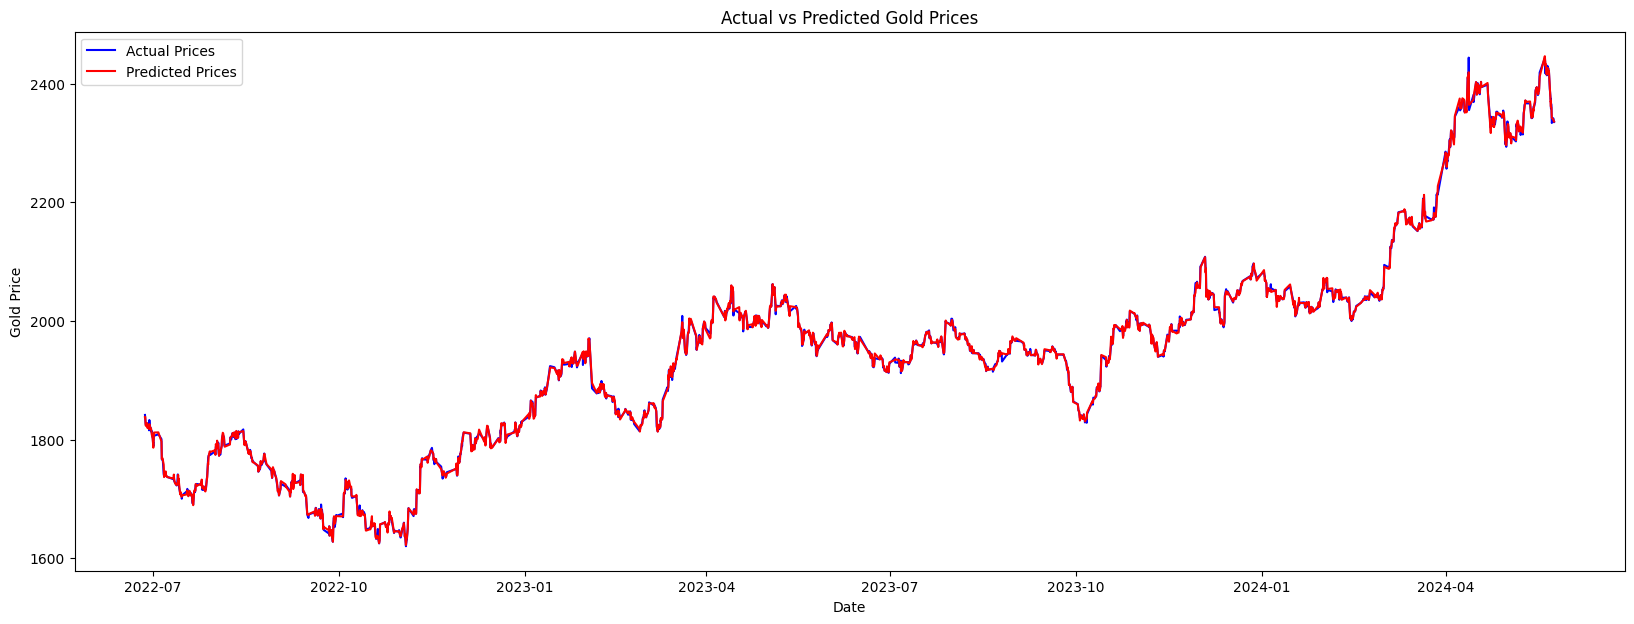

In [7]:
plt.figure(figsize=(20, 7))
plt.plot(results_sorted.index, results_sorted['Actual'], label='Actual Prices', color='blue')
plt.plot(results_sorted.index, results_sorted['Predicted'], label='Predicted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.title('Actual vs Predicted Gold Prices')
plt.legend()
plt.show()

In [9]:
print({mse}, {r2_score})

{11.887404128597257} {<function r2_score at 0x000001DB396A1620>}
